In [2]:
# Set-up statements that we will nearly always use
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

# Vectors and Matrices in NumPy

In [2]:
# We can make vectors in numpy using the array() function
x = np.array([3,4])

In [3]:
# And get their size using the shape() command
np.shape(x)

(2,)

In [59]:
# Numpy does have one 'interesting' feature with vectors
y = np.array([[3],[4]])
print(np.shape(y))

(2, 1)


In [10]:
# Numpy doesn't really differentiate between vectors and matrices (and tensors)
a = np.array([[1,2],[2,3],[3,4]])
print(a)
# To index them we give row and column (starting from 0)
# Remember the : notation 
print("==")
print(a[2,1])
print("==")
print(a[:,0])
# Note:
print(np.shape(a[:,0]))

[[1 2]
 [2 3]
 [3 4]]
==
4
==
[1 2 3]
(3,)


In [116]:
# There are some special matrices
I = np.eye(3)
O = np.ones((3,3))
Z = np.zeros((3,4))

print(I)
print(O)
print(Z)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [131]:
# Diagonal matrix
np.diag([3,4,5])

array([[3, 0, 0],
       [0, 4, 0],
       [0, 0, 5]])

In [13]:
def draw_vec(x,start=None,colour=None):
    x = np.squeeze(x)
    if start is None:
        start = np.array([0,0])
    if colour is None:
        colour = 'b'
    pl.arrow(start[0],start[1],x[0],x[1],head_width=0.05, head_length=0.1, linewidth=2, color=colour,length_includes_head=True)

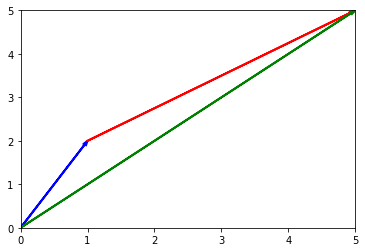

In [7]:
draw_vec([1,2])
draw_vec([4,3],[1,2],'r')
draw_vec([5,5],colour='g')
pl.axis([0,5,0,5]);

[0, 5, 0, 5]

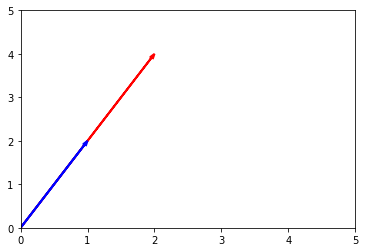

In [53]:
x = np.array([1,2])
draw_vec(2*x,colour='r')
draw_vec(x)
pl.axis([0,5,0,5])

(-5.0, 5.0, -5.0, 5.0)

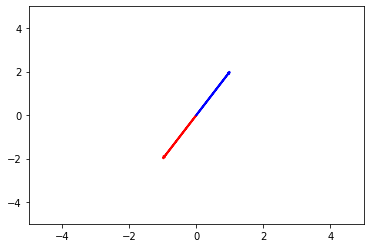

In [9]:
x = np.array([1,2])
draw_vec(-x,colour='r')
draw_vec(x)
pl.axis([-5,5,-5,5])

In [36]:
np.linalg.norm([3,4])

5.0

In [10]:
print(np.linalg.norm(x))
print(np.linalg.norm(-x))
print(np.linalg.norm(2*x))

2.23606797749979
2.23606797749979
4.47213595499958


In [13]:
# Vector multiplication
x = np.array([1,2])
y = np.array([2,2])

print(x*y)
print("==")
print(np.dot(x,y))
theta = np.arctan2(2,2)-np.arctan2(1,2)
#print(theta)
print(np.linalg.norm(x) * np.linalg.norm(y) * np.cos(theta))

[2 4]
==
6
0.3217505543966422
6.0


# Linear Regression I

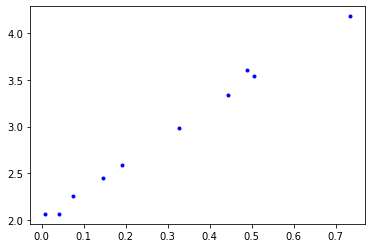

In [8]:
# Given beta, compute points
npoints = 10
beta = np.array([2,3])
epsilon = np.random.randn(10)*0.05
for i in range(npoints):
    x = np.array([1,np.random.rand()])
    y = np.dot(x,beta) + epsilon[i]
    pl.plot(x[1],y,'b.')


# Scikit-Learn

The machine learning library that we will use in the course is called scikit-learn. It has many of the machine learning algorithms in common use easily available. In more advanced courses you might also find out about tensorflow or pytorch for deep learning, but they aren't necessary for this course.

You normally import particular algorithms from scikit-learn, rather than the whole thing. Let's see their version of linear regression:

In [30]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
print(reg.coef_)
reg.predict([[0.5,0.5]])

[0.5 0.5]


array([0.5])

The library also has lots of tools for preprocessing data and splitting data into testing and training. For example:

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

from sklearn.model_selection import test_train_split
sklearn.model_selection.train_test_split

It can do cross-validation automatically too, you should look up the syntax when you need it. And in sklearn.metrics there are lots of output metrics implemented. We will use some of these in the tutorial.

In [122]:
# Matrix norm
np.linalg.norm(I)

1.7320508075688772

In [11]:
# Transpose
print(a)
print(a.T)

[[1 2]
 [2 3]
 [3 4]]
[[1 2 3]
 [2 3 4]]


In [152]:
a = np.array([[1,2,3],[2,3,4],[3,4,5]])
x = np.array([[1,2,5]])
print(a)
print(np.shape(a))
print("==")
print(x.T)
print(np.shape(x.T))
print("==")
print(np.dot(a,x.T))
print("==")
print(a.T*x.T)

[[1 2 3]
 [2 3 4]
 [3 4 5]]
(3, 3)
==
[[1]
 [2]
 [5]]
(3, 1)
==
[[20]
 [28]
 [36]]
==
[[ 1  2  3]
 [ 4  6  8]
 [15 20 25]]


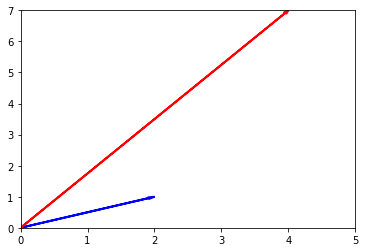

In [161]:
a = np.array([[1,2],[2,3]])
x = np.array([[2,1]])
y = np.dot(a,x.T)
draw_vec(x)
draw_vec(y,colour='r')
pl.axis([0,5,0,7]);

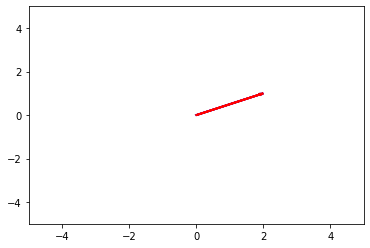

In [14]:
a = np.eye(2)
x = np.array([[2,1]])
y = np.dot(a,x.T)
draw_vec(x)
draw_vec(y,colour='r')
pl.axis([-5,5,-5,5]);

In [167]:
a = np.array([[1,2,3],[2,3,4],[3,4,5]])
b = np.random.rand(3,3)
a*b

array([[0.55693713, 0.0156316 , 2.77409467],
       [1.93480488, 2.50136623, 2.43453663],
       [0.22544976, 2.49074718, 4.94893618]])

In [16]:
a = np.random.rand(3,2)
b = np.random.rand(2,4)
#print(np.shape(a*b))
print(np.shape(np.dot(a,b)))

(3, 4)


In [20]:
a = np.array([[1,3,3],[2,3,4],[3,4,5]])
ai = np.linalg.inv(a)
print(np.dot(a,ai))

[[ 1.00000000e+00 -4.44089210e-16  4.44089210e-16]
 [ 4.44089210e-16  1.00000000e+00  0.00000000e+00]
 [ 2.22044605e-16 -4.44089210e-16  1.00000000e+00]]


In [26]:
a = np.array([[1,2,3],[2,3,4],[3,4,5]])
#ai = np.linalg.inv(a)
ai = np.linalg.pinv(a)
print(np.dot(a,ai))

[[ 0.83333333  0.33333333 -0.16666667]
 [ 0.33333333  0.33333333  0.33333333]
 [-0.16666667  0.33333333  0.83333333]]


In [21]:
a = np.random.rand(3,2)
np.linalg.inv(a)
np.linalg.pinv(a)

LinAlgError: Last 2 dimensions of the array must be square

In [179]:
a = np.eye(3)
np.linalg.inv(a)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [180]:
d = np.diag([3,4,5])
np.linalg.inv(d)

array([[0.33333333, 0.        , 0.        ],
       [0.        , 0.25      , 0.        ],
       [0.        , 0.        , 0.2       ]])

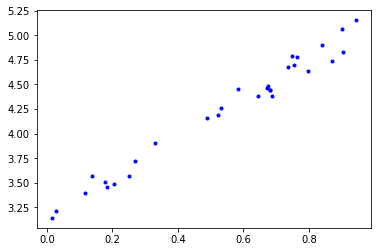

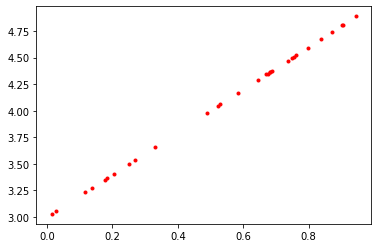

In [194]:
beta = np.array([[2],[3]])
x = np.random.rand(30,1)    
y = beta[0]*x + beta[1] 
z = y + 0.3*np.random.rand(30,1)
pl.plot(x,z,'b.')
pl.figure();
pl.plot(x,y,'r.')

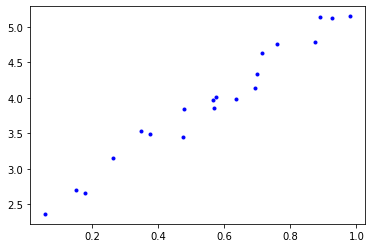

In [243]:
npoints = 20
beta = np.array([[2,3]])
x = np.random.rand(2,npoints)
x[0,:] = 1
y = np.dot(beta,x) + 0.5*np.random.rand(1,npoints)


[[2.24125779]
 [3.06027664]]


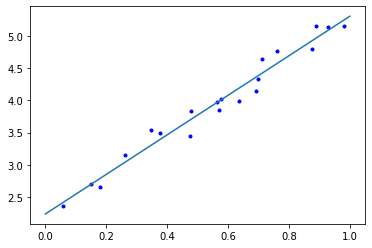

In [270]:
from scipy.linalg import lstsq
betahat,r,rank,sigma = lstsq(x.T,y.T)
pl.plot(x[1,:],y.T,'b.')
newx = np.linspace(0,1,num=50)
newX = np.ones((2,50))
newX[1,:] = newx
pl.plot(newx,np.dot(betahat.T,newX)[0,:] )
print(betahat)

In [265]:
xi = np.linalg.pinv(x)

In [268]:
np.dot(xi.T,y.T)

array([[2.24125779],
       [3.06027664]])